<a href="https://colab.research.google.com/github/mayankraj25/Patient-Risk-Stratification-Dashboard/blob/main/HealtyChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "alexteboul/diabetes-health-indicators-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


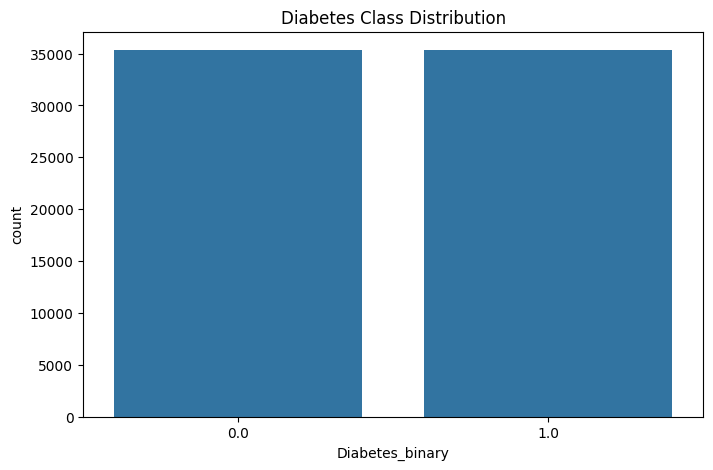

Diabetes_binary
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64
HighBP
1.0    39832
0.0    30860
Name: count, dtype: int64
Checkng for null values

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [41]:
# Check target variable distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Diabetes_binary')
plt.title('Diabetes Class Distribution')
plt.show()
print(df['Diabetes_binary'].value_counts(normalize=True)*100)
print(df['HighBP'].value_counts())
print("Checkng for null values\n")
print(df.isnull().sum())

In [49]:
features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
            'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']
X=df[features]
y=df['Diabetes_binary']

X.astype(np.float32)
y.astype(np.float32)

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
70687,1.0
70688,1.0
70689,1.0
70690,1.0


In [43]:
X.head(15)

,HighBP,HighChol,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,Age,Income
0,1.0,0.0,26.0,0.0,0.0,1.0,3.0,5.0,30.0,4.0,8.0
1,1.0,1.0,26.0,1.0,0.0,0.0,3.0,0.0,0.0,12.0,8.0
2,0.0,0.0,26.0,0.0,0.0,1.0,1.0,0.0,10.0,13.0,8.0
3,1.0,1.0,28.0,1.0,0.0,1.0,3.0,0.0,3.0,11.0,8.0
4,0.0,0.0,29.0,1.0,0.0,1.0,2.0,0.0,0.0,8.0,8.0
5,0.0,0.0,18.0,0.0,0.0,1.0,2.0,7.0,0.0,1.0,7.0
6,0.0,1.0,26.0,1.0,0.0,1.0,1.0,0.0,0.0,13.0,6.0
7,0.0,0.0,31.0,1.0,0.0,0.0,4.0,0.0,0.0,6.0,3.0
8,0.0,0.0,32.0,0.0,0.0,1.0,3.0,0.0,0.0,3.0,8.0
9,0.0,0.0,27.0,1.0,0.0,0.0,3.0,0.0,6.0,6.0,4.0


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
scaler=StandardScaler()
X_train[['BMI','GenHlth','MentHlth']]=scaler.fit_transform(X_train[['BMI','GenHlth','MentHlth']])
X_test[['BMI','GenHlth','MentHlth']]=scaler.transform(X_test[['BMI','GenHlth','MentHlth']])

In [55]:
model=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 71.31%


In [60]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Scale all features for clustering
X_scaled = scaler.fit_transform(X)

# KMeans Clustering (e.g. 3 groups)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add to original dataframe for analysis
df['risk_cluster'] = clusters

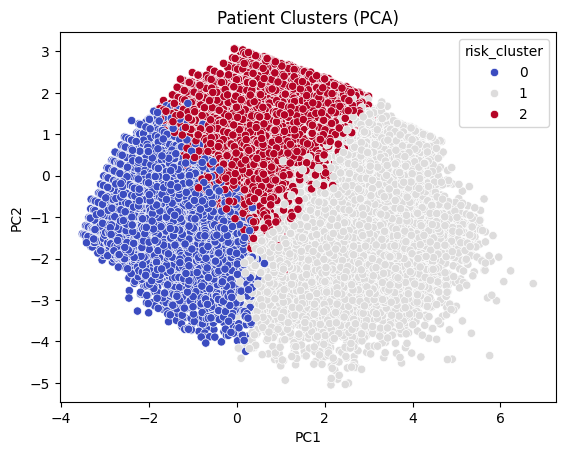

In [61]:
# Use PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = components[:, 0], components[:, 1]

sns.scatterplot(x='PC1', y='PC2', hue='risk_cluster', data=df, palette='coolwarm')
plt.title("Patient Clusters (PCA)")
plt.show()

In [63]:
import joblib
import os
os.makedirs("model", exist_ok=True)
joblib.dump(model, 'model/risk_classifier.pkl')
joblib.dump(scaler, 'model/scaler.pkl')
joblib.dump(kmeans, 'model/risk_cluster.pkl')

['model/risk_cluster.pkl']